In [47]:
from qiskit import QuantumCircuit, QuantumRegister, Aer, transpile
import numpy as np

In [3]:
a_registers = QuantumRegister(4, name="a")
b_registers = QuantumRegister(4, name="b")

In [4]:
def get_r_angle(r):
    return (2*np.pi) / (2**r) 

r1 = get_r_angle(1)
r2 = get_r_angle(2)
r3 = get_r_angle(3)
r4 = get_r_angle(4)

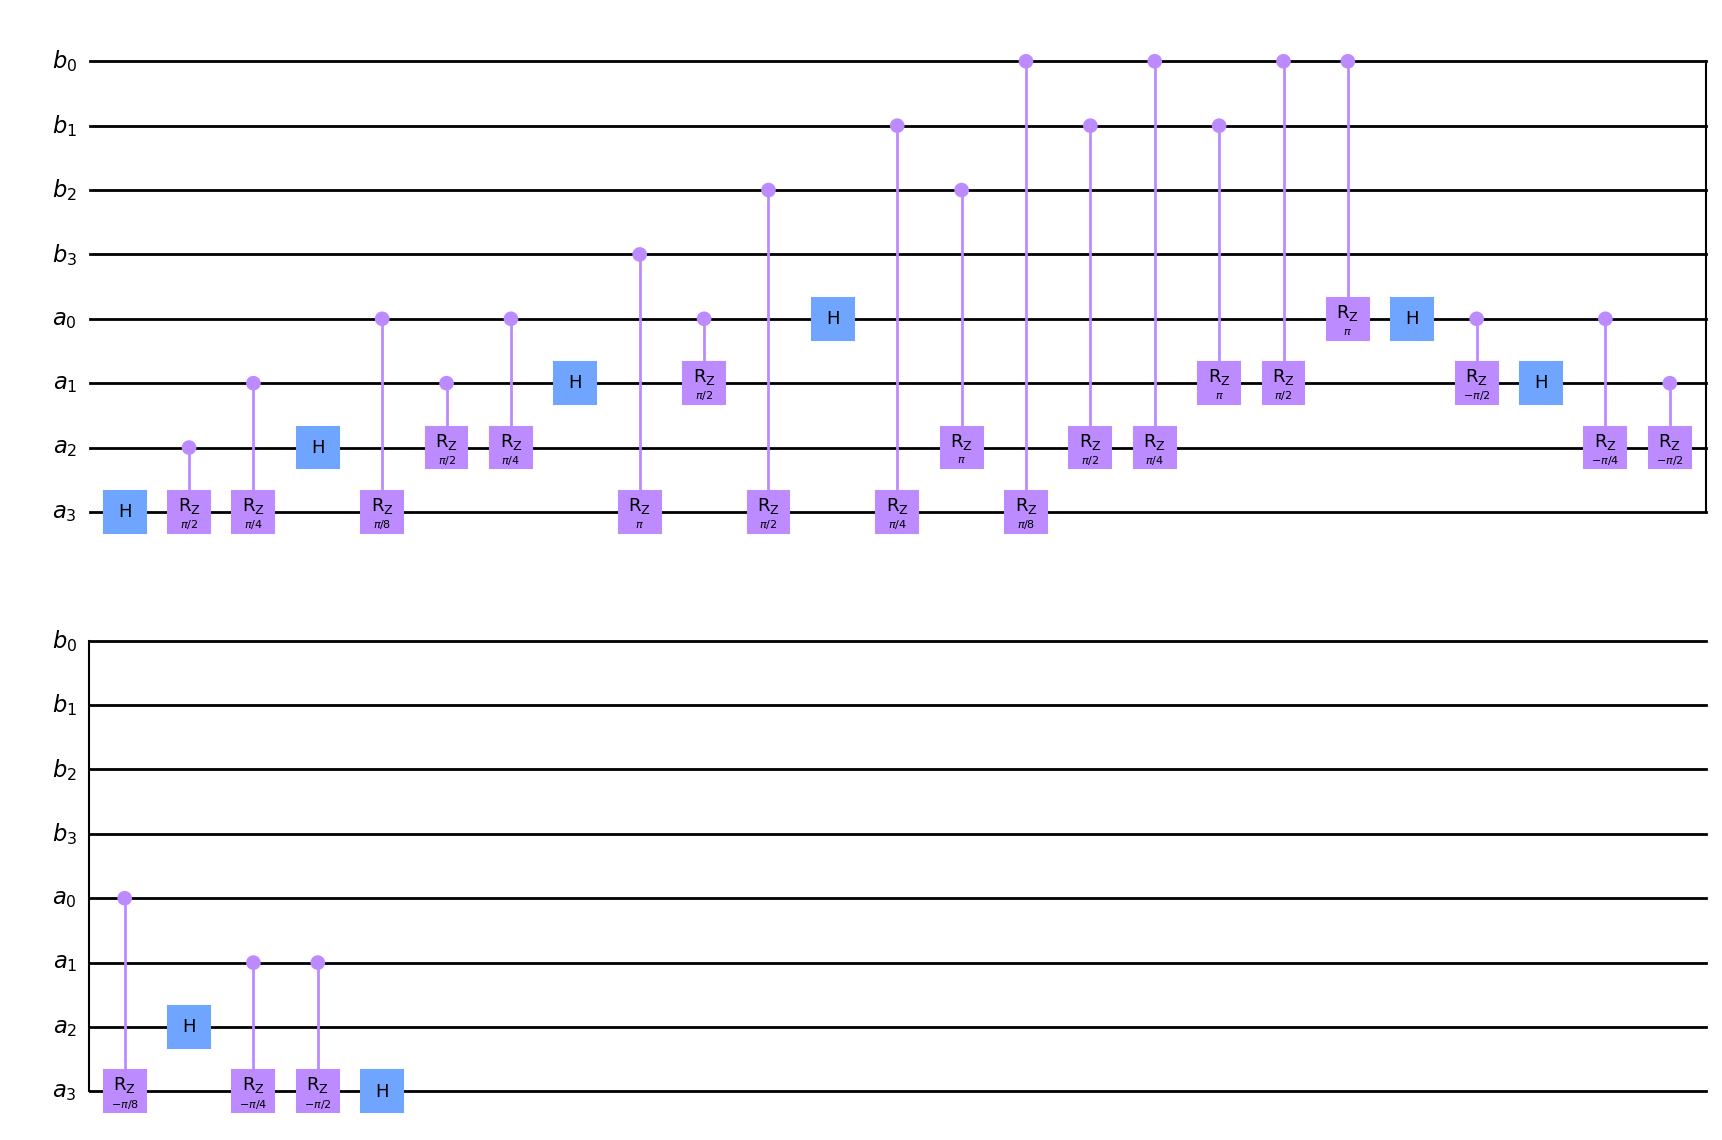

In [37]:
adder = QuantumCircuit(b_registers, a_registers)

adder.h(a_registers[-1])
adder.crz(r2, a_registers[-2], a_registers[-1])
adder.crz(r3, a_registers[-3], a_registers[-1])
adder.crz(r4, a_registers[-4], a_registers[-1])

adder.h(a_registers[-2])
adder.crz(r2, a_registers[-3], a_registers[-2])
adder.crz(r3, a_registers[-4], a_registers[-2])

adder.h(a_registers[-3])
adder.crz(r2,  a_registers[-4], a_registers[-3])

adder.h(a_registers[-4])


adder.crz(r1,  b_registers[-1], a_registers[-1])
adder.crz(r2,  b_registers[-2], a_registers[-1])
adder.crz(r3,  b_registers[-3], a_registers[-1])
adder.crz(r4,  b_registers[-4], a_registers[-1])

adder.crz(r1,  b_registers[-2], a_registers[-2])
adder.crz(r2,  b_registers[-3], a_registers[-2])
adder.crz(r3,  b_registers[-4], a_registers[-2])

adder.crz(r1,  b_registers[-3], a_registers[-3])
adder.crz(r2,  b_registers[-4], a_registers[-3])

adder.crz(r1,  b_registers[-4], a_registers[-4])

adder.h(a_registers[-4])
adder.crz(-r2, a_registers[-4], a_registers[-3])
adder.h(a_registers[-3])
adder.crz(-r3, a_registers[-4], a_registers[-2])
adder.crz(-r2, a_registers[-3], a_registers[-2])
adder.h(a_registers[-2])

adder.crz(-r4, a_registers[-4], a_registers[-1])
adder.crz(-r3, a_registers[-3], a_registers[-1])
adder.crz(-r2, a_registers[-3], a_registers[-1])
adder.h(a_registers[-1])

adder.draw("mpl")

In [39]:
A = adder.to_gate()

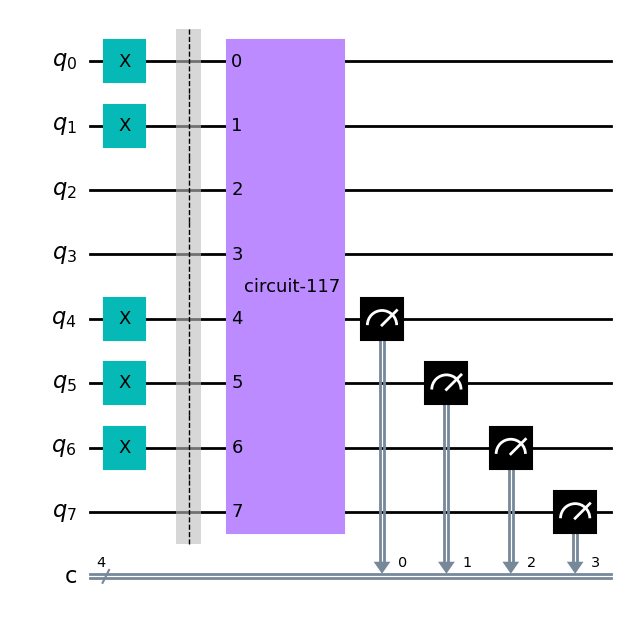

In [51]:
qc = QuantumCircuit(8,4)
qc.x(range(2))
qc.x(range(4, 7))

qc.barrier()

qc.append(A, range(8))

qc.measure([4, 5, 6, 7], [0, 1, 2, 3])

qc.draw("mpl")

In [52]:
sim = Aer.get_backend('aer_simulator')
sim.run(transpile(qc, sim)).result().get_counts()

{'1010': 542, '0010': 482}